# U.S. Geological Survey Intro to MODFLOW Class
San Diego, CA\
January 6-10, 2025


## Examining and Visualizing PEST++ Output

In [1]:
import shutil
from pathlib import Path

import flopy as fp
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyemu
from matplotlib.backends.backend_pdf import PdfPages

#### *quick note* feel free to change the paths in the next cell to account for running different options. the `ies_dir` should match `rundir` in the previous notebook, and you can drop your plots wherever you like

In [2]:
ies_dir = Path("../tmprun/")
plotdir = Path("./plotting")
if not plotdir.exists():
    plotdir.mkdir()
pst = pyemu.Pst(str(ies_dir / "mv.ies.pst"))

In [3]:
pst.parameter_data

,parnme,partrans,parchglim,parval1,parlbnd,parubnd,pargp,scale,offset,dercom,i,j,zone
parnme,,,,,,,,,,,,,
hk_aq_i:10_j:10_zone:5,hk_aq_i:10_j:10_zone:5,log,factor,200.000000,0.010000,1000.000000,hk_aq_5,1.0,0.0,1,10,10,5
hk_aq_i:10_j:13_zone:5,hk_aq_i:10_j:13_zone:5,log,factor,200.000000,0.010000,1000.000000,hk_aq_5,1.0,0.0,1,10,13,5
hk_aq_i:10_j:16_zone:5,hk_aq_i:10_j:16_zone:5,log,factor,200.000000,0.010000,1000.000000,hk_aq_5,1.0,0.0,1,10,16,5
hk_aq_i:10_j:19_zone:5,hk_aq_i:10_j:19_zone:5,log,factor,200.000000,0.010000,1000.000000,hk_aq_5,1.0,0.0,1,10,19,5
hk_aq_i:10_j:1_zone:4,hk_aq_i:10_j:1_zone:4,log,factor,200.000000,0.010000,750.000000,hk_aq_4,1.0,0.0,1,10,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
hk_clay_i:9_j:9_zone:1,hk_clay_i:9_j:9_zone:1,log,factor,1.000000,0.000100,100.000000,hk_clay_1,1.0,0.0,1,9,9,1
kaniso,kaniso,log,factor,0.200000,0.001000,0.850000,anisotropy,1.0,0.0,1,NaN,NaN,NaN
kaniso_clay,kaniso_clay,log,factor,0.500000,0.001000,0.850000,anisotropy_clay,1.0,0.0,1,NaN,NaN,NaN


In [4]:
obs_true = pst.observation_data
obs_true.sample(5)

,obsnme,obsval,weight,obgnme,standard_deviation
obsnme,,,,,
u16,u16,2.76,7.917254,headgroup,0.25
u01,u01,12.05,7.917254,headgroup,0.25
w17,w17,6.22,7.917254,headgroup,0.25
w10,w10,10.64,7.917254,headgroup,0.25
ds,ds,-894494.00,0.000023,rivgroup,89449.40


In [5]:
obs_noise = pd.read_csv("../tmprun/mv.ies.obs+noise.csv", index_col=0)
obs_noise.sample(5)

,chdflow,ds,pf,u01,u02,u03,u04,u05,u06,u07,...,w08,w09,w10,w11,w12,w13,w14,w15,w16,w17
real_name,,,,,,,,,,,,,,,,,,,,,
23,31715.2,-876661.0,-106066.0,12.1183,11.9802,11.7177,11.4219,11.1317,10.7297,9.30892,...,8.85198,8.75137,10.5334,4.42994,4.48753,7.26588,2.74035,4.57313,2.75999,5.93544
45,31123.6,-898002.0,-90746.5,11.8955,11.4696,12.5883,11.6722,10.7201,11.0696,9.34737,...,8.95129,8.60782,10.6885,3.81879,4.40691,7.67058,3.10115,4.84890,2.88271,6.15536
46,31128.6,-724090.0,-100053.0,12.5374,11.5711,12.2914,11.9149,11.2632,10.6570,9.21432,...,8.83797,8.76241,10.6889,4.28309,4.31268,7.54274,2.78484,4.80925,2.71963,6.32535
96,29101.8,-865126.0,-89499.3,11.9432,11.4107,12.0757,11.3081,10.8945,11.1981,9.15494,...,8.72980,8.86781,11.0047,3.90154,4.37899,7.33257,2.62585,4.45403,2.79349,6.39494
97,31626.0,-924790.0,-86908.7,11.7583,11.5504,12.0858,11.4082,11.0717,10.7451,8.73547,...,8.86617,8.73003,10.6180,4.41059,4.27123,7.43103,2.63573,4.22406,2.99816,6.11121


## take a look at the prior MC 

In [6]:
phi = pd.read_csv(ies_dir / "mv.ies.phi.actual.csv").T.iloc[6:]
phi0 = phi[0]

<Axes: >

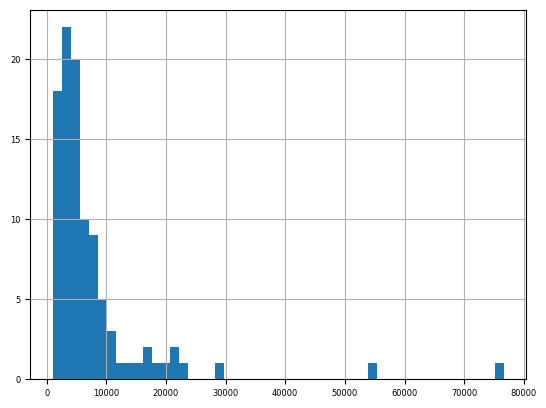

In [7]:
phi0.hist(bins=50)

## but we need to reject "bad" PHI values 

In [8]:
phitoohigh_prior = 10000  # baseline is 10000
indobskeep_prior = phi.loc[phi[0] <= phitoohigh_prior].index

In [9]:
phi0.loc[indobskeep_prior]

0       8218.63
2       6800.13
4       2561.26
5       6021.57
6       6197.10
         ...   
95      3216.61
96      1476.81
97      2799.66
98      4128.65
base    1209.41
Name: 0, Length: 83, dtype: float64

<Axes: >

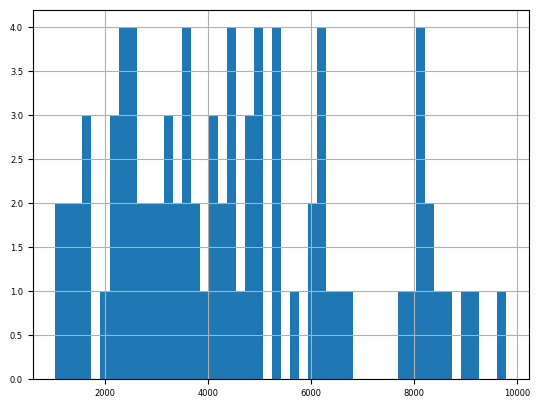

In [10]:
phi0.loc[indobskeep_prior].hist(bins=50)

### How about prior-data conflict?

In [11]:
if (ies_dir / "mv.ies.pdc.csv").exists():
    pdc = pd.read_csv(ies_dir / "mv.ies.pdc.csv")
    pdc
else:
    print('No PDC detected')

No PDC detected


## let's check out the observations from prior MC and iES

In [12]:
pst = pyemu.Pst(str(ies_dir / "mv.ies.pst"))

In [13]:
obsdat = pst.observation_data.copy()
obsdat.sample(5)

,obsnme,obsval,weight,obgnme,standard_deviation
obsnme,,,,,
w10,w10,10.64,7.917254,headgroup,0.25
pf,pf,-96402.00,0.000189,rivgroup,9640.20
u09,u09,8.86,7.917254,headgroup,0.25
w05,w05,10.50,7.917254,headgroup,0.25
u04,u04,11.44,7.917254,headgroup,0.25


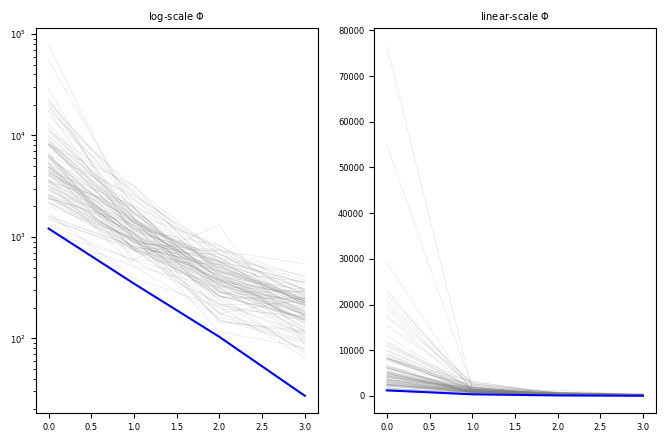

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(8, 5))
phi.T.plot(legend=False, color="grey", alpha=0.2, lw=0.5, ax=ax[0])
phi.loc["base"].plot(color="b", ax=ax[0])
ax[0].set_yscale("log")
ax[0].set_title("log-scale $\\Phi$")
phi.T.plot(legend=False, color="grey", alpha=0.2, lw=0.5, ax=ax[1])
phi.loc["base"].plot(color="b", ax=ax[1])
ax[1].set_title("linear-scale $\\Phi$");

In [15]:
phi = pd.read_csv(ies_dir / "mv.ies.phi.actual.csv").T.iloc[6:]
for cc in phi.columns:
    phi.loc[phi[cc] > 1e6, cc] = np.nan

## We can focus in on iteration 3 as "best" and see how things changed due to iES

In [16]:
citer = 3
obs = pd.read_csv(ies_dir / "mv.ies.0.obs.csv", index_col=0)
obs_final = pd.read_csv(ies_dir / f"mv.ies.{citer}.obs.csv", index_col=0)

### drop the bad prior realizations

<Axes: >

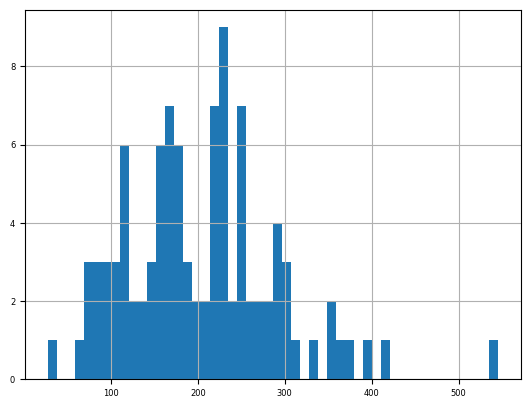

In [17]:
phi[3].hist(bins=50)

## but we need to reject "bad" PHI values again

In [18]:
phitoohigh = 310


In [19]:
indobskeep = phi.loc[phi[3] <= phitoohigh].index

In [20]:
obs = obs.loc[indobskeep_prior]
obs_final = obs_final.loc[indobskeep]

In [21]:
obs_noise_prior = obs_noise.loc[indobskeep_prior]
obs_noise_final = obs_noise.loc[indobskeep]

In [22]:
with PdfPages(plotdir / "allobs.prior.pdf") as outpdf:
    for cc in obs.columns:
        plt.figure()
        ax = obs[cc].hist(bins=20, color="grey", alpha=0.5, density=1)
        obs_noise_prior[cc].hist(
            bins=20, color="orange", alpha=0.5, density=1, ax=ax
        )
        ax.axvline(obsdat.loc[cc].obsval, color="orange")
        plt.title(cc)
        plt.tight_layout()
        outpdf.savefig()
        plt.close("all")

In [23]:
with PdfPages(plotdir / f"allobs.iter_{citer}.pdf") as outpdf:
    for cc in obs.columns:
        plt.figure()
        ax = obs[cc].hist(bins=20, color="grey", alpha=0.5, density=1)
        obs_noise_final[cc].hist(
            bins=20, color="orange", alpha=0.5, density=1, ax=ax
        )

        obs_final[cc].hist(bins=20, color="blue", density=1)
        ax.axvline(obsdat.loc[cc].obsval, color="orange")
        plt.title(cc)
        plt.tight_layout()
        outpdf.savefig()
        plt.close("all")

## how does this look spatially?

In [24]:
# load up the model with flopy
sim = fp.mf6.MFSimulation.load(sim_ws=ies_dir)
m = sim.get_model()

loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package dis...
    loading package ic...
    loading package npf...
    loading package oc...
    loading package chd...
    loading package rch...
    loading package riv...
    loading package wel...
    loading package obs...
  loading solution package at...


In [25]:
df_deep = pd.DataFrame.from_records(m.obs[2].continuous.data["at.csv"])
df_deep

,obsname,obstype,id,id2
0,w01,head,"(4, 2, 17)",None
1,w02,head,"(3, 3, 10)",None
2,w03,head,"(3, 6, 20)",None
3,w04,head,"(3, 12, 22)",None
4,w05,head,"(4, 14, 11)",None
5,w06,head,"(3, 16, 18)",None
6,w07,head,"(3, 17, 1)",None
7,w08,head,"(3, 18, 6)",None
8,w09,head,"(3, 19, 11)",None
9,w10,head,"(3, 18, 22)",None


In [26]:
df_shallow = pd.DataFrame.from_records(m.obs[2].continuous.data["at.wt.csv"])
df_shallow

,obsname,obstype,id,id2
0,u01,head,"(0, 2, 17)",None
1,u02,head,"(0, 3, 10)",None
2,u03,head,"(0, 6, 20)",None
3,u04,head,"(0, 12, 22)",None
4,u05,head,"(0, 14, 11)",None
5,u06,head,"(0, 16, 18)",None
6,u07,head,"(0, 17, 1)",None
7,u08,head,"(0, 18, 6)",None
8,u09,head,"(0, 19, 11)",None
9,u10,head,"(0, 18, 22)",None


## find the cell centers for the head observations for plotting

In [27]:
xc, yc = m.modelgrid.xcellcenters, m.modelgrid.ycellcenters
for df in [df_deep, df_shallow]:
    df["y"] = [yc[i[1], i[2]] for i in df["id"]]
    df["x"] = [xc[i[1], i[2]] for i in df["id"]]

## let's look and the base residuals and get the standard deviation of the residuals

In [28]:
for df in [df_deep, df_shallow]:
    df["resid_prior_std"] = [
        (obs[i] - obs_true.loc[i].obsval).std() for i in df.obsname
    ]
    df["resid_post_std"] = [
        (obs_final[i] - obs_true.loc[i].obsval).std() for i in df.obsname
    ]
    df["base_prior_resid"] = [
        obs.loc["base", i] - obs_true.loc[i].obsval for i in df.obsname
    ]
    df["base_post_resid"] = [
        obs_final.loc["base", i] - obs_true.loc[i].obsval for i in df.obsname
    ]

In [29]:
df

,obsname,obstype,id,id2,y,x,resid_prior_std,resid_post_std,base_prior_resid,base_post_resid
0,u01,head,"(0, 2, 17)",None,18750.0,8750.0,0.921624,0.141839,0.57890,0.12510
1,u02,head,"(0, 3, 10)",None,18250.0,5250.0,0.590710,0.115678,0.20480,0.19480
2,u03,head,"(0, 6, 20)",None,16750.0,10250.0,0.943272,0.142411,0.41970,-0.12420
3,u04,head,"(0, 12, 22)",None,13750.0,11250.0,0.958639,0.129443,0.30320,0.13250
4,u05,head,"(0, 14, 11)",None,12750.0,5750.0,0.697361,0.134144,-0.32480,-0.18850
5,u06,head,"(0, 16, 18)",None,11750.0,9250.0,1.019590,0.149768,-0.29940,0.00800
6,u07,head,"(0, 17, 1)",None,11250.0,750.0,0.789318,0.180595,-0.17739,-0.03820
7,u08,head,"(0, 18, 6)",None,10750.0,3250.0,1.048701,0.165548,-0.29058,0.04199
8,u09,head,"(0, 19, 11)",None,10250.0,5750.0,1.238138,0.187915,-0.63241,0.06148
9,u10,head,"(0, 18, 22)",None,10750.0,11250.0,1.074879,0.201571,-0.32940,0.03720


Text(0.5, 0.98, 'Base Realization Shallow Residuals')

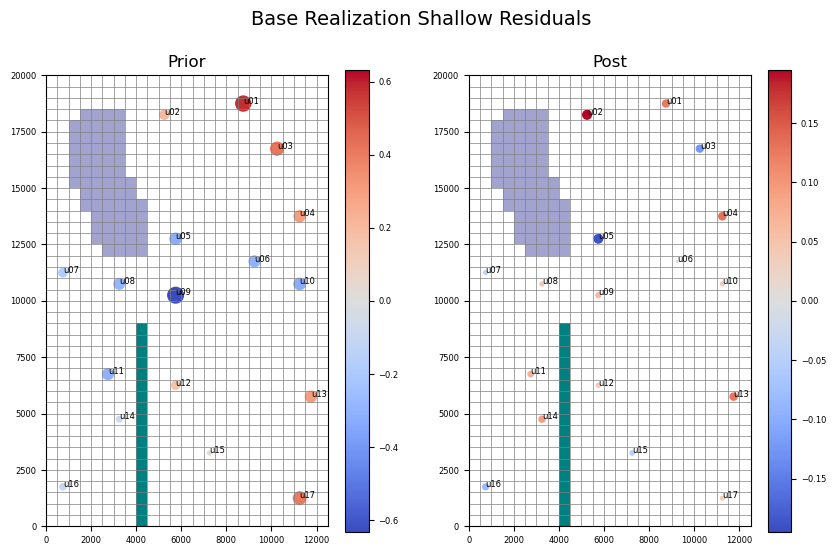

In [30]:
fig, allax = plt.subplots(1, 2, figsize=(10, 6))
for ax, cc in zip(allax, ["base_prior_resid", "base_post_resid"]):
    ax.set_aspect("equal")
    pmv = fp.plot.PlotMapView(m, ax=ax)
    lc = pmv.plot_grid(lw=0.5)
    # pmv.plot_array(m.npf.k[1].array, alpha=.1)
    pmv.plot_bc("RIV")
    pmv.plot_bc("CHD", alpha=0.2)

    c = ax.scatter(
        df_shallow.x,
        df_shallow.y,
        s=np.abs(df_shallow[cc]) * 200,
        c=df_shallow[cc],
        norm=mpl.colors.CenteredNorm(),
        cmap="coolwarm",
    )
    [
        ax.text(x, y, s)
        for x, y, s in zip(
            df_shallow.x.values, df_shallow.y.values, df_shallow.obsname.values
        )
    ]
    plt.colorbar(c)
    ax.set_title(cc.split("_")[1].capitalize(), fontsize=12)
plt.suptitle("Base Realization Shallow Residuals", fontsize=14)

Text(0.5, 0.98, 'Base Realization Deep Residuals')

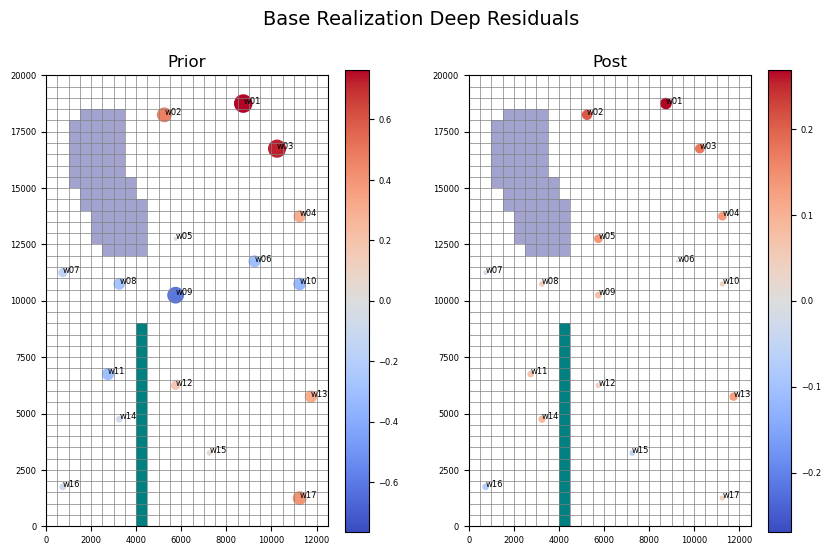

In [31]:
fig, allax = plt.subplots(1, 2, figsize=(10, 6))
for ax, cc in zip(allax, ["base_prior_resid", "base_post_resid"]):
    ax.set_aspect("equal")
    pmv = fp.plot.PlotMapView(m, ax=ax)
    lc = pmv.plot_grid(lw=0.5)
    # pmv.plot_array(m.npf.k[1].array, alpha=.1)
    pmv.plot_bc("RIV")
    pmv.plot_bc("CHD", alpha=0.2)

    c = ax.scatter(
        df_deep.x,
        df_deep.y,
        s=np.abs(df_deep[cc]) * 200,
        c=df_deep[cc],
        norm=mpl.colors.CenteredNorm(),
        cmap="coolwarm",
    )
    [
        ax.text(x, y, s)
        for x, y, s in zip(
            df_deep.x.values, df_deep.y.values, df_deep.obsname.values
        )
    ]

    plt.colorbar(c)
    ax.set_title(cc.split("_")[1].capitalize(), fontsize=12)
plt.suptitle("Base Realization Deep Residuals", fontsize=14)

Text(0.5, 0.98, 'Standard Deviation of Shallow Residuals')

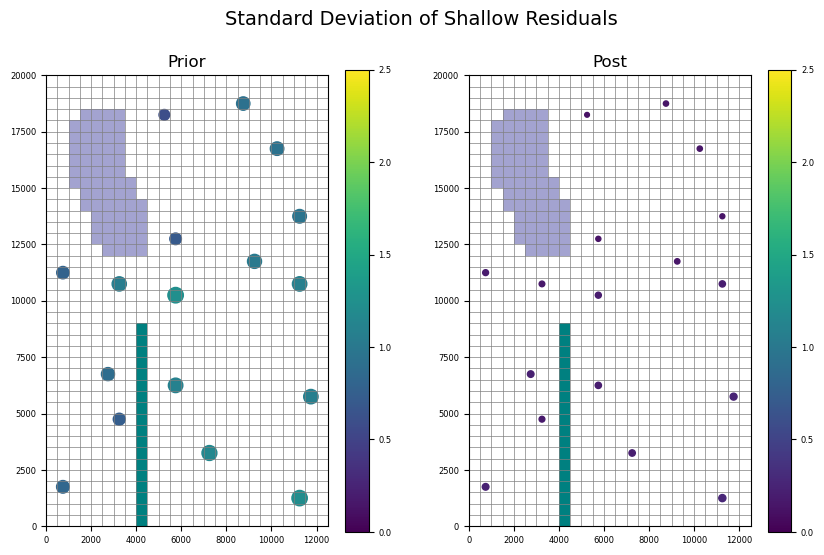

In [32]:
fig, allax = plt.subplots(1, 2, figsize=(10, 6))
for ax, cc in zip(allax, ["resid_prior_std", "resid_post_std"]):
    ax.set_aspect("equal")
    pmv = fp.plot.PlotMapView(m, ax=ax)
    lc = pmv.plot_grid(lw=0.5)
    # pmv.plot_array(m.npf.k[1].array, alpha=.3)
    pmv.plot_bc("RIV")
    pmv.plot_bc("CHD", alpha=0.2)

    c = ax.scatter(
        df_shallow.x,
        df_shallow.y,
        s=df_shallow[cc] * 100,
        c=df_shallow[cc],
        vmin=0,
        vmax=2.5,
    )
    plt.colorbar(c)
    ax.set_title(cc.split("_")[1].capitalize(), fontsize=12)
plt.suptitle("Standard Deviation of Shallow Residuals", fontsize=14)

Text(0.5, 0.98, 'Standard Deviation of Deep Residuals')

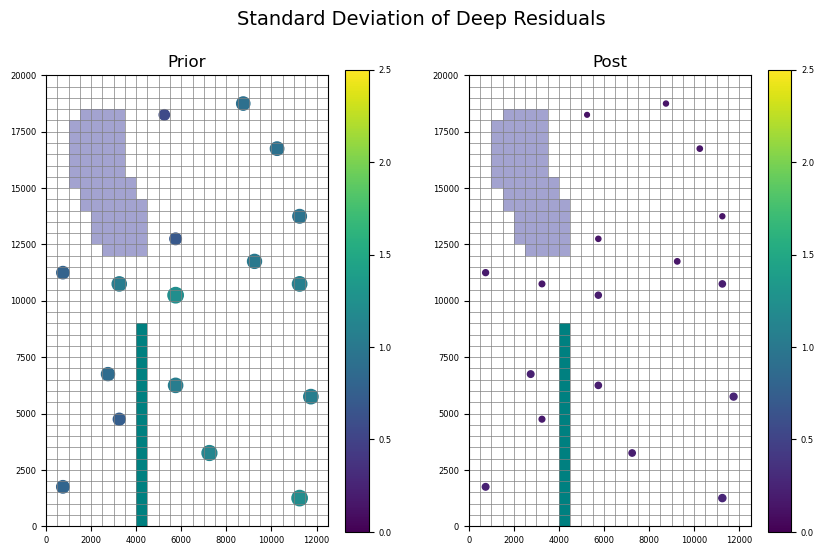

In [33]:
fig, allax = plt.subplots(1, 2, figsize=(10, 6))
for ax, cc in zip(allax, ["resid_prior_std", "resid_post_std"]):
    ax.set_aspect("equal")
    pmv = fp.plot.PlotMapView(m, ax=ax)
    lc = pmv.plot_grid(lw=0.5)
    # pmv.plot_array(m.npf.k[1].array, alpha=.3)
    pmv.plot_bc("RIV")
    pmv.plot_bc("CHD", alpha=0.2)

    c = ax.scatter(
        df_deep.x,
        df_deep.y,
        s=df_deep[cc] * 100,
        c=df_deep[cc],
        vmin=0,
        vmax=2.5,
    )
    plt.colorbar(c)
    ax.set_title(cc.split("_")[1].capitalize(), fontsize=12)
plt.suptitle("Standard Deviation of Deep Residuals", fontsize=14)

# Visualize a single set of fields

In [34]:
tmpdir = Path("../scratch")
if tmpdir.exists():
    shutil.rmtree(tmpdir)
shutil.copytree(ies_dir, tmpdir)

PosixPath('../scratch')

In [35]:
pst = pyemu.Pst(str(tmpdir / "mv.ies.pst"))

In [36]:
pars = pd.read_csv(ies_dir / "mv.ies.3.par.csv", index_col=0)
pars

,hk_aq_i:10_j:10_zone:5,hk_aq_i:10_j:13_zone:5,hk_aq_i:10_j:16_zone:5,hk_aq_i:10_j:19_zone:5,hk_aq_i:10_j:1_zone:4,hk_aq_i:10_j:22_zone:5,hk_aq_i:10_j:4_zone:4,hk_aq_i:10_j:7_zone:1,hk_aq_i:13_j:10_zone:5,hk_aq_i:13_j:13_zone:5,...,hk_clay_i:3_j:3_zone:1,hk_clay_i:3_j:9_zone:1,hk_clay_i:9_j:15_zone:1,hk_clay_i:9_j:21_zone:1,hk_clay_i:9_j:3_zone:1,hk_clay_i:9_j:9_zone:1,kaniso,kaniso_clay,rch,rv1
real_name,,,,,,,,,,,,,,,,,,,,,
0,224.127,109.946,159.537,870.3450,209.8500,561.853,746.9630,197.2770,718.5540,288.0560,...,3.288270,0.052802,0.764964,0.188447,0.020954,0.090769,0.148961,0.062328,0.003557,176616.0
1,196.838,270.739,780.793,856.5490,417.3490,1000.000,20.7292,400.0710,192.5930,174.6820,...,0.108693,0.021164,15.112800,1.074400,22.357100,0.242917,0.194615,0.100769,0.003393,1000000.0
2,121.086,709.716,372.382,1000.0000,301.5430,968.651,438.7040,934.6160,54.2243,154.6610,...,0.941623,0.314246,30.851700,0.405678,1.246930,0.141116,0.154358,0.028588,0.003481,760444.0
3,1000.000,611.582,579.843,428.6750,64.7732,296.175,54.2407,492.5290,144.2070,338.4020,...,0.040118,0.016892,0.443944,11.463200,1.590480,2.985600,0.070255,0.188760,0.003561,291643.0
4,1000.000,798.800,1000.000,92.7003,151.1650,343.586,34.3218,542.1470,361.2070,371.8550,...,3.633750,0.099569,0.815816,70.159000,14.525300,0.019628,0.288117,0.079992,0.003621,145612.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,751.117,226.699,1000.000,126.1340,255.7510,260.688,198.2050,728.4010,192.6920,105.9450,...,0.122358,0.017728,100.000000,4.719970,0.024740,0.645652,0.644715,0.041860,0.003761,291633.0
96,196.696,894.649,394.767,999.8850,117.2630,368.913,660.7680,462.7810,145.6250,80.9699,...,0.052598,0.002883,1.262530,1.908810,0.320005,0.207055,0.330891,0.115920,0.003502,192695.0
97,1000.000,1000.000,1000.000,969.3090,55.3988,176.690,58.4220,14.2012,795.7710,593.8340,...,0.081039,0.009014,22.921600,1.039040,51.287200,0.015367,0.203200,0.159423,0.003714,163229.0


In [37]:
pst.control_data.noptmax = 0

## good to check out the base realization, but could choose another

In [38]:
real_to_plot = "base"

In [39]:
pst.parameter_data.loc[pars.loc[real_to_plot].index, "parval1"] = pars.loc[
    real_to_plot
]

In [40]:
pst.write(str(tmpdir / "testrun.pst"), version=2)

noptmax:0, npar_adj:119, nnz_obs:40


In [41]:
pyemu.os_utils.run("pestpp-ies testrun.pst", str(tmpdir))



             pestpp-ies: a GLM iterative ensemble smoother

                   by the PEST++ development team


version: 5.2.16
binary compiled on Dec  1 2024 at 18:51:00

started at 07/03/25 13:27:40
...processing command line: ' ./pestpp-ies testrun.pst'
...using serial run manager

using control file: "testrun.pst"
in directory: "/Users/mnfienen/Documents/GIT/modflow-sandiego-2025/exercises/tmp/PEST/scratch"
on host: "IGSACB116LHMNFI"

processing control file testrun.pst

Note: 'NOPTMAX' == 0, switching to forgiveness mode when checking inputs

noptmax = 0, resetting max_run_fail = 1
parameter warning: 2 parameters are at upper bound
checking model IO files...done
              starting serial run manager ...


  ---  initializing  ---  

  ---  'noptmax'=0, running control file parameter values and quitting  ---  
...saving control file parameter ensemble to  testrun.base.par.csv
...initializing prior parameter covariance matrix
...parcov loaded  from parameter bounds, using par_

In [42]:
idom = m.dis.idomain.array[2]

## viz the k fields and other parameters

saved par and rei files for realization BASE


pestpp-ies analysis complete...
started at 07/03/25 13:27:40
finished at 07/03/25 13:27:42
took 0.0166667 minutes


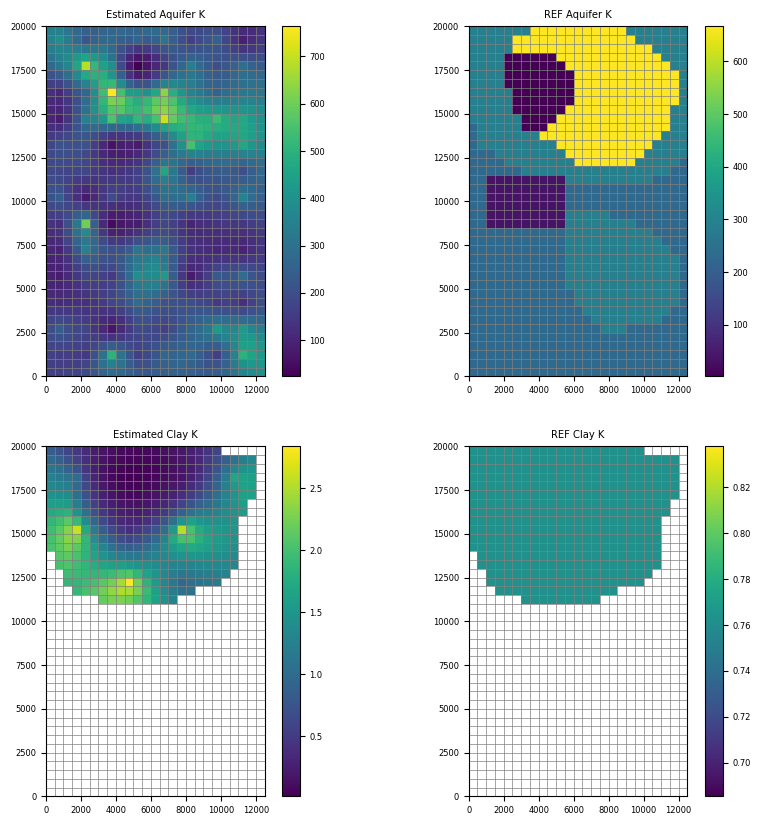

In [43]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for cax, carr, ctitle in zip(
    ax.ravel(),
    [
        np.loadtxt(tmpdir / "k_aq.ref"),
        m.npf.k.data[1],
        np.loadtxt(tmpdir / "k_clay.ref"),
        m.npf.k.data[2],
    ],
    ["Estimated Aquifer K", "REF Aquifer K", "Estimated Clay K", "REF Clay K"],
):
    cax.set_aspect("equal")
    pmv = fp.plot.PlotMapView(m, ax=cax)
    lc = pmv.plot_grid(lw=0.5)
    if "clay" in ctitle.lower():
        carr[idom < 0] = np.nan
    c = pmv.plot_array(carr)
    plt.colorbar(c)
    cax.set_title(ctitle)

![ktrue](./k_true.png)

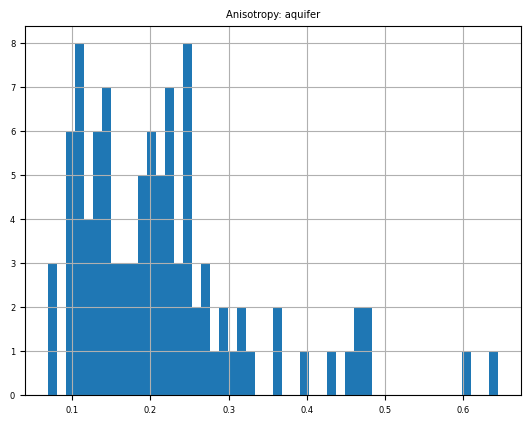

In [44]:
pars.kaniso.hist(bins=50)
plt.title("Anisotropy: aquifer");

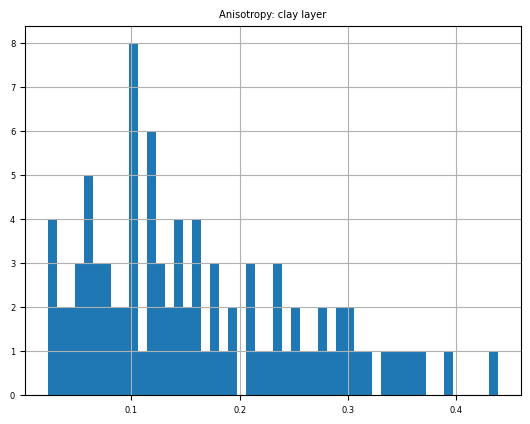

In [45]:
pars.loc[indobskeep].kaniso_clay.hist(bins=50)
plt.title("Anisotropy: clay layer");

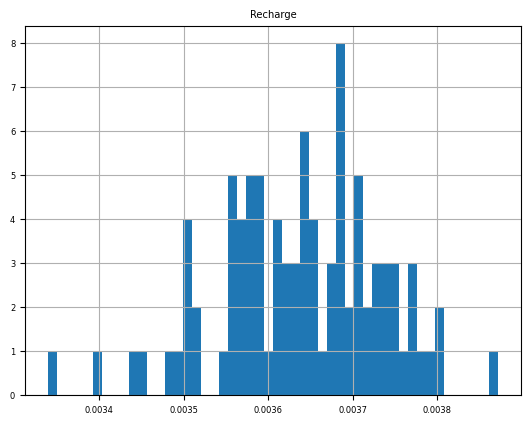

In [46]:
pars.loc[indobskeep].rch.hist(bins=50)
plt.title("Recharge");

In [47]:
mfinal = fp.mf6.MFSimulation.load(sim_ws=str(tmpdir)).get_model()
h = mfinal.output.head().get_data()

loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package dis...
    loading package ic...
    loading package npf...
    loading package oc...
    loading package chd...
    loading package rch...
    loading package riv...
    loading package wel...
    loading package obs...
  loading solution package at...


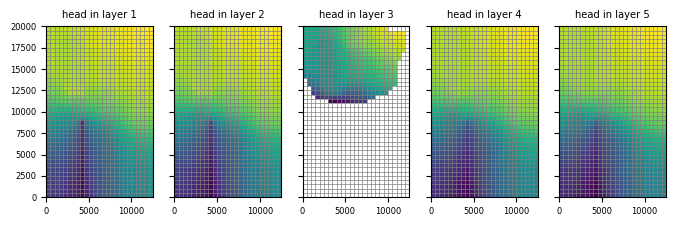

In [48]:
fig, ax = plt.subplots(1, 5, figsize=(8, 4), sharey=True)
for i, cax in zip([0, 1, 2, 3, 4], ax):
    pmv = fp.plot.PlotMapView(mfinal, ax=cax)
    pmv.plot_grid(lw=0.5)
    pmv.plot_array(h[i])
    cax.set_title(f"head in layer {i+1}")
    cax.set_aspect(1)